In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer

# The naive Bayes algorithm
Bayes Theorem is a fundamental theorem in probability and statistics, and it helps us calculate probabilities
<br/>
<img src="Bayes.png" width="600" height="200">
<br/>
* The main concept is using previous data for calculating new probability.
* Bayes theorem consists in calculating a posterior probability, based on a prior
probability and an event.
* The interesting thing about Naive Bayes that it does not have loss function, optimization function or activation function.
* The naive Bayes algorithm is used when one wants to combine a prior probability
together with several events.
* The word ‘naive’ comes from the fact that we are making a naive assumption, namely,
that the events in question are all independent.


In [15]:
data = load_breast_cancer()
features = pd.DataFrame( data.data, columns = data.feature_names)
target = pd.DataFrame( data.target )
target.drop_duplicates(0)

,0
0,0
19,1


In [52]:
# Scaling features in order to be able to binarize them after using threshold
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [75]:
from sklearn import naive_bayes

# In sklearn there are a lot of implementations of NB
# Bernoulli Naive Bayes classifier is designed for binary/boolean features
# The Multinomial Naive Bayes classifier is suitable for classification with discrete features
# The Categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distribute
# The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

# We can use will Multinomial Naive Bayes because our features are discrete but we can try also use bernoulli using binarization 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( scaled_features, target.to_numpy().ravel(), random_state= 65, train_size=0.7 )

# Binarize - parameter that transorms features into 1 if it is above threshold or 0 otherwise
# BernoulliNB requires features to be boolean - 0 or 1. So in order to create working model we need to firstly nomalize features and secondly set threshold for binarize parameter

model_mult = naive_bayes.MultinomialNB( force_alpha= True ).fit( X_train, y_train )

model_mult.predict( X_test ) 

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

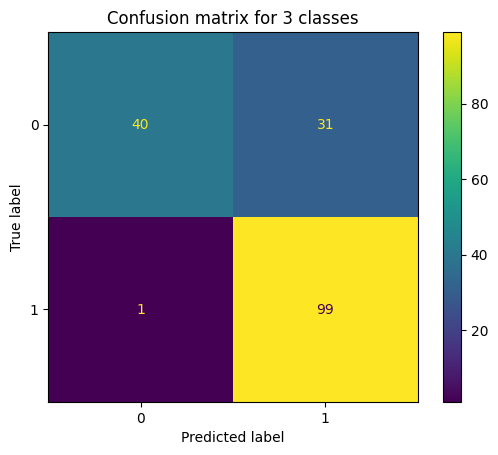

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_mult = model_mult.predict( X_test )
# Confusion matrix is great tool for observing the predicted results of model 
cm = confusion_matrix(y_test, y_pred_mult)
types = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=types)

disp.plot()
plt.title('Confusion matrix for 3 classes')
plt.show()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#metrics
def metrics( cm, y_pred, y_test ):
    # Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. 
    accuracy = accuracy_score( y_test, y_pred )

    # Precision is a measure of how accurate a model’s positive predictions are
    precision = precision_score( y_test, y_pred, average='weighted' )

    # Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset
    recall = recall_score( y_test, y_pred, average='weighted' )

    # F1-score is used to evaluate the overall performance of a classification model
    f1_score = (2 * precision * recall) / (precision + recall)

    print( "Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1_Score = {:.2f}" \
          .format(accuracy, precision, recall, f1_score))

metrics (cm, y_pred_mult, y_test)
print( "score_accuracy = {}".format(model_mult.score( X_test, y_test)))

Accuracy = 0.81, Precision = 0.85, Recall = 0.81, F1_Score = 0.83
score_accuracy = 0.8128654970760234


In [78]:
# Binarize - parameter that transorms features into 1 if it is above threshold or 0 otherwise
# BernoulliNB requires features to be boolean - 0 or 1. So in order to create working model we need to firstly nomalize features and secondly set threshold for binarize parameter
model_Bern = naive_bayes.BernoulliNB( force_alpha= True , binarize=0.5 ).fit( X_train, y_train )


model_Bern.predict( X_test ) 

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

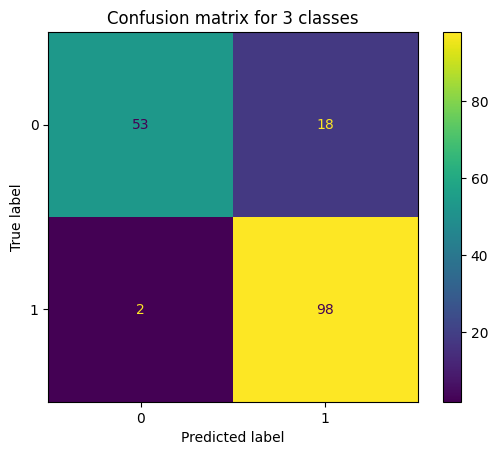

In [86]:
y_pred_bern = model_Bern.predict( X_test )

# Confusion matrix is great tool for observing the predicted results of model 
cm = confusion_matrix(y_test, y_pred_bern)
types = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=types)

disp.plot()
plt.title('Confusion matrix for 3 classes')
plt.show()

In [88]:
#metrics
metrics (cm, y_pred_bern, y_test)
print( "score_accuracy = {}".format(model_Bern.score( X_test, y_test)))

Accuracy = 0.88, Precision = 0.89, Recall = 0.88, F1_Score = 0.89
score_accuracy = 0.8830409356725146
